# Actividad 03: Regresión Logística

El objetivo de esta actividad es que programes tú mismo el algoritmo de entrenamiento del modelo de Regresión Logística. Para probar tu modelo vas a tener que usar el _dataset_ de flores _Iris_.

## Parte 1 (3 pts): programando el modelo

En el codigo de abajo hay una clase llamada `LogisticRegression` cuyo constructor recibe como parámetro el número de _features_ que espera recibir. Tienes que completar esta clase para que pueda entrenar y predecir. Lo que necesitas es:

- Programar el método `train`, que vendría a ser equivalente al método `fit` de Scikit Learn. Tienes que utilizar el algoritmo _Gradient Descent_ visto en clases.
- Programar el método `predict` que asume que tu modelo ya está entrenado.

Para hacer esto puedes hacer los supuestos razonables que estimes conveniente. Además, si te acomoda trabajar sin clases puedes hacerlo, mientras uses el algoritmo de _Gradient Descent_. **Importante**: puedes asumir que una instancia es "positiva" si la probabilidad es `>=` que 0.5.

Recuerda además que el gradiente de la función objetivo para cada $\beta_i$ es:

$$
\frac{\delta}{\delta \beta_i}L(\beta) = \frac{1}{n} \sum_{i=1}^n (\sigma(\beta^T x_i) - y_i) x_i^j
$$

Donde $L(\beta)$ es la función objetivo, $\beta$ es el vector de coeficientes para la regresión, tenemos $n$ filas en nuestro _dataset_, $\sigma(x)$ es la función $\frac{1}{1 + e^{-x}}$, $x_i$ es la fila $i$ de nuestro dataset (y asociado tiene su respuesta $y_i$) y finalmente $x_i^j$ es la columna $j$ de la fila $i$ en nuestro _dataset_.

In [ ]:
# Tienes que programar la parte 1 aquí
import numpy as np

# La función sigmoide
def sigmoid(x):    
    output = 1 / (1 + np.exp(-x))
    return output

class LogisticRegression:
    def __init__(self, number_of_features, learning_rate=0.001, number_of_iterations=100):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.beta = np.random.randn(number_of_features, 1)
        
    def train(self, X, y):
        #Guardamos el Largo por que será importante
        largo_X=len(X)
        #Primer for: cantidad de iteraciones
        for iteration in range(self.number_of_iterations):
          #Segundo for: Indice de nuestra derivada de Beta
          for i in range(len(self.beta)):
            derivada_Beta=0
            #Tercer For: Indice de la posicion en X para iterar respecto a todos los valores
            for j in range(largo_X):
              derivada_Beta += (sigmoid(X[j].dot(np.array(self.beta)))-y[j])*X[j][i]
            derivada_Beta=derivada_Beta/largo_X
            #Acá ajustamos los Beta en base a la derivada obtenida
            if (derivada_Beta > 0): 
              self.beta[i] -= self.learning_rate
            elif (derivada_Beta < 0): 
              self.beta[i] += self.learning_rate
                      
    def predict(self, value):
        #Calculamos la suma para luego utilizar Sigmoide
        suma = np.array(value).dot(np.array(self.beta))
        #Y retornamos el valor correspondiente
        if sigmoid(suma) >=0.5:
          return "Como el valor es "+str(sigmoid(suma))+" La flor es una Iris Virginica"
        else:
          return "Como el valor es "+str(sigmoid(suma))+" La flor no es una Iris Virginica"

# Ejemplo de uso de la clase para 3 features
log_reg = LogisticRegression(3)
print(log_reg.beta)

[[ 1.58691608]
 [-0.06899882]
 [-0.41456987]]


## Parte 2 (1 pto): entrenando el modelo

En esta parte tendrás que hacer un clasificador de flores _Iris Virginica_ en base al largo y ancho del pétalo. Así, tu modelo se tiene que comportar como el que vimos en clases, en el que entrenabamos con los largos y anchos de los pétalos del _dataset_ y nuestras respuestas correspondían a si la flor era o no _Iris Virginica_.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # Nos quedamos con largo y el ancho del petalo
y = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica

# Recuerda que vas a tener que usar la versión con bias del dataset
# Es decir, añadir una primera columna solamente con 1s
X_b = np.c_[np.ones((X.shape[0], 1)), X]
#Utilizamos esto para corroborar como se comporta los largos 
#for i in range(len(X)):
#  print(X[i],y[i])
#al ver la matriz podemos entender que el predict requiere de una matriz de (1,3)

# Ahora un ejemplo de como multiplicar la fila 0 con los coeficientes transpuestos (descomentar linea siguiente)
log_reg.train(X_b,y)

In [ ]:
#Dependientes del ancho
print("anchos cambiantes")
print(log_reg.predict([[1, 3, 2.0]]))
print(log_reg.predict([[1, 3, 1.8]]))
print(log_reg.predict([[1, 3, 1.6]]))
print(log_reg.predict([[1, 3, 1.4]]))
print(log_reg.predict([[1, 3, 1.2]]))
print(log_reg.predict([[1, 3, 1.0]]))
print(log_reg.predict([[1, 3, 0.8]]))
#Dependientes del largo
print("largos cambiantes")
print(log_reg.predict([[1, 3, 1.3]]))
print(log_reg.predict([[1, 4, 1.3]]))
print(log_reg.predict([[1, 5, 1.3]]))
print(log_reg.predict([[1, 6, 1.3]]))
print(log_reg.predict([[1, 7, 1.3]]))


anchos cambiantes
Como el valor es [[0.54953198]] La flor es una Iris Virginica
Como el valor es [[0.56878455]] La flor es una Iris Virginica
Como el valor es [[0.58783144]] La flor es una Iris Virginica
Como el valor es [[0.60661888]] La flor es una Iris Virginica
Como el valor es [[0.62509613]] La flor es una Iris Virginica
Como el valor es [[0.64321594]] La flor es una Iris Virginica
Como el valor es [[0.66093501]] La flor es una Iris Virginica
largos cambiantes
Como el valor es [[0.61589932]] La flor es una Iris Virginica
Como el valor es [[0.5752197]] La flor es una Iris Virginica
Como el valor es [[0.53349505]] La flor es una Iris Virginica
Como el valor es [[0.49129646]] La flor no es una Iris Virginica
Como el valor es [[0.44922154]] La flor no es una Iris Virginica


## Parte 3 (2 pts): entendiendo los resultados de tu modelo

En clases vimos un gráfico que en los ejes tenía el largo y el ancho del pétalo, donde podíamos ver de forma gráfica como nuestro modelo genera una recta que divide los puntos que corresponden a las flores _Iris Virginica_ de las que no lo son. En esta parte de la tarea debes hacer el mismo gráfico, pero con los resultados que entregó tu modelo. compara este gráfico con el entregado por SciKit Learn.

[1.48691608]
[-0.16899882]
[-0.39056987]


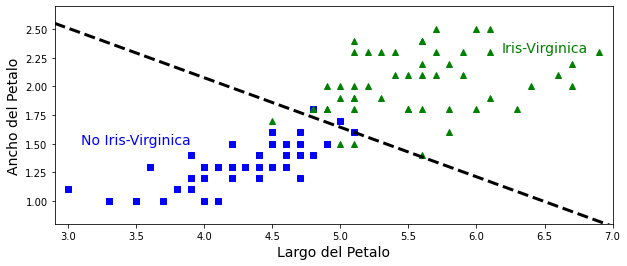

In [ ]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
#Literalmente es lo que está en clases, así que no deberia haber problemas
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
#Podria llamarse perro y seguiria funcionando, lo dejo por comodidad 
left_right = np.array([2.9, 7])
#llamamos a los betas obtenidos luego de las 100 iteraciones
boundary = -(log_reg.beta[1] * left_right + log_reg.beta[0]) / log_reg.beta[2]
#los imprimimos para ver que valorea arrojan
print(log_reg.beta[0])
print(log_reg.beta[1])
print(log_reg.beta[2])

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "No Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Largo del Petalo", fontsize=14)
plt.ylabel("Ancho del Petalo", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

Podemos ver claramente que el modelo se ve bastante similar al que vimos en clase. Esto se consiguió despues de multiples intentos, ya que no tenemos una forma de optimizar los betas. Este fue el resultado más cercano que pudimos obtener.

### Parte 4 \[Bonus\] (0.5 pts): gradient descent y resultados

En esta parte la idea es entender cómo cambia la división de nuestro _dataset_ a medida que pasan las iteraciones del algoritmo de _Gradient Descent_. Por lo mismo la idea es repetir el gráfico de arriba pero esta vez con un _widget_ que nos permita escoger la i-ésima iteración del algoritmo de _Gradient Descent_. El _widget_ debe ir desde 0 a 1000 iteraciones.

In [ ]:
# Haremos este entrenamiento de forma manual, sin llamar a la clase ANTERIOR
import ipywidgets as widgets
n_iteraciones = 1000
#creamos una lista que contenga a todos los betas
lista=[]
betas=[ 1.58691608,-0.06899882,-0.41456987]
lista.append(betas)
largo_X=len(X_b)
#Primer for: cantidad de iteraciones
for iteracion in range(n_iteraciones):
#Segundo for: Indice de nuestra derivada de Beta
    for i in range(3):
        derivada_beta = 0
         #Tercer For: Indice de la posicion en X para iterar respecto a todos los valores
        for j in range(largo_X):
            derivada_beta += (sigmoid(np.array(X_b[j]).dot(np.array(betas))) - y[j])*X_b[j][i]
        derivada_beta = derivada_beta/largo_X
        betas[i]=betas[i] - 0.001*derivada_beta
#y vamos agregando los betas mejorados por cada iteración
    lista.append(betas)
#corroboramos si el largo es igual a las 1000 iteraciones más 1
print(len(lista))

I_iteracion = widgets.IntSlider(min=0, max=1000)
display(I_iteracion)

1001


IntSlider(value=0, max=1000)

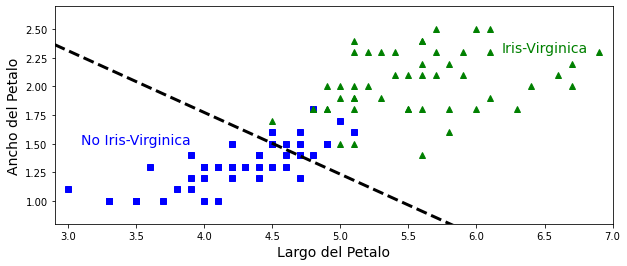

In [ ]:
#Guardamos el valor y retornamos los valores que necesitamos de la lista
numero=I_iteracion.value
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
left_right = np.array([2.9, 7])
boundary1 = -(lista[numero][1]*left_right +lista[numero][0])/lista[numero][2]
plt.plot(left_right, boundary1, "k--", linewidth=3)
plt.text(3.5, 1.5, "No Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Largo del Petalo", fontsize=14)
plt.ylabel("Ancho del Petalo", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Detalles académicos

Este control pueden realizarlo en grupos de hasta dos personas. La entrega de este control debe ser un archivo comprimido donde se encuentre un **Jupyter Notebook**, junto a cualquier archivo que estés llamando desde tu código. **La fecha de entrega es hasta el viernes 9 de octubre, hasta las 20:00 pm, cualquier entrega después de este plazo será calificada con la nota mínima**. La nota se calcula como el número de puntos + un punto base. El archivo comprimido se entrega en un cuestionario de Webcursos.